# EDA 

### importing libraries/modules

In [5]:
!pip install xgboost

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

### loading dataset 

In [53]:
df = pd.read_csv('USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [54]:
df.shape

(5000, 7)

In [55]:
df.tail(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,"86727 Kelly Plaza\nLake Veronica, IL 04474"
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579"
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [56]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [58]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [59]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [60]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [61]:
df['Avg. Area Income']

0       79545.458574
1       79248.642455
2       61287.067179
3       63345.240046
4       59982.197226
            ...     
4995    60567.944140
4996    78491.275435
4997    63390.686886
4998    68001.331235
4999    65510.581804
Name: Avg. Area Income, Length: 5000, dtype: float64

# handling missig data 

In [62]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [63]:
df['Avg. Area Income'].skew()

-0.03371997540427538

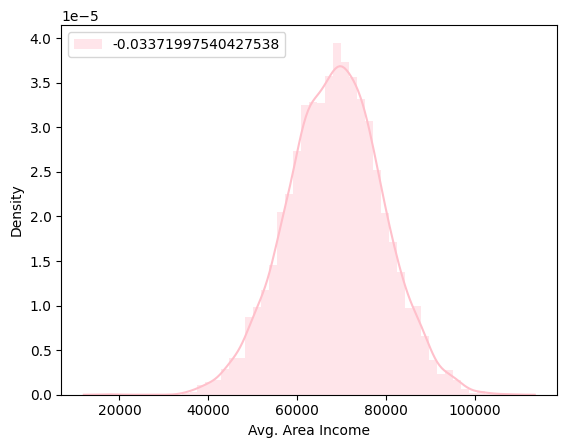

In [64]:
sns.distplot(df['Avg. Area Income'], label=df['Avg. Area Income'].skew(),
             color='pink')
plt.legend()
plt.show()

In [65]:
print(df['Avg. Area Income'].mean())
print(df['Avg. Area Income'].median())
df['Avg. Area Income'].fillna(df['Avg. Area Income'].mean(), inplace=True)

68583.10898395974
68804.28640371616


In [66]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# duplicate data 

In [67]:
print(df.duplicated().sum())
df[df.duplicated()]

0


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [68]:
df.drop_duplicates(keep='first', inplace=True)


# outliers 

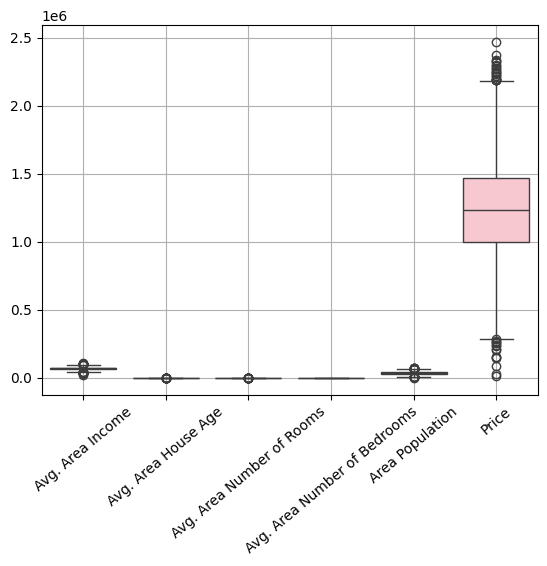

In [69]:
sns.boxplot(df,color='pink')
plt.xticks(rotation=40)
plt.grid()
plt.show()

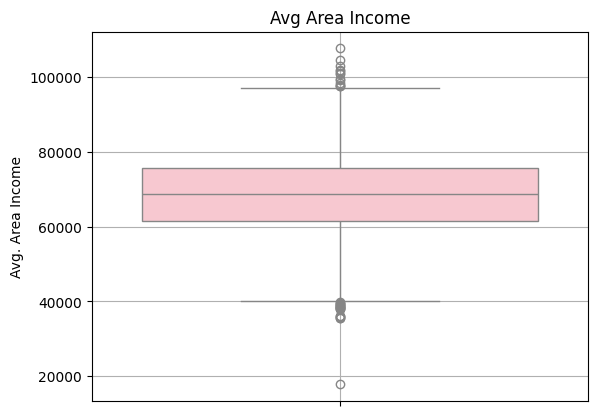

In [70]:
sns.boxplot(df['Avg. Area Income'],color='pink')
plt.title('Avg Area Income')
plt.grid()
plt.show()

In [71]:
df[df['Avg. Area Income'] > 97000]


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
428,97112.361252,5.914725,6.133646,3.10,51470.067638,1.917584e+06,"35841 Christine Shore\nWallmouth, NC 98956-5357"
558,99629.013581,5.431863,7.351398,5.45,36950.739057,1.883481e+06,"PSC 0420, Box 6835\nAPO AE 08359"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"
962,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06,"856 Harris Centers Suite 940\nNicholasport, IL..."
1096,97548.310413,5.460973,6.609396,2.50,39089.415712,2.026303e+06,"349 Sean Forges\nWhitakerville, WY 85138-4153"
1734,104702.724257,5.575523,6.932106,3.22,22560.527135,1.742432e+06,"14230 Douglas River Suite 570\nConniechester, ..."
1891,101144.323930,6.350845,7.231771,3.09,35772.524007,2.007556e+06,"233 Wilson Ranch Suite 086\nWest Christine, IN..."
2300,98468.253641,7.035383,6.629233,3.05,50676.312404,2.275455e+06,USNV Hoffman\nFPO AA 45311-5701
2719,101599.670580,7.798746,7.480512,6.39,37523.864670,2.370231e+06,"52280 Steven Street\nRobertchester, IA 40405-0504"
3483,97881.587279,5.034395,7.575905,5.46,37152.799341,1.859161e+06,"01230 Peter Loop Suite 135\nEdwardstad, SC 67538"


In [72]:
len(df[df['Avg. Area Income'] > 97000])

15

In [73]:
df[df['Avg. Area Income'] < 40000]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
411,36100.444227,5.778489,5.497450,2.29,44901.857338,5.995040e+05,"842 Duane Brook Apt. 380\nMonicaview, AR 01639..."
844,39411.652788,4.385845,7.047435,4.44,45851.398296,5.394834e+05,"1085 Michele Glens Apt. 517\nSergiotown, VT 20367"
1271,37971.207566,4.291224,5.807510,3.24,33267.767728,3.114052e+04,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919"
1459,35963.330809,3.438547,8.264122,3.28,24435.777302,1.430274e+05,"166 Terry Grove\nSouth Michaelhaven, PR 18054"
1597,39294.036523,5.928585,5.960676,4.36,43183.516104,7.811375e+05,"829 Bonnie Rue Suite 653\nYorkville, MP 35797-..."
2025,38139.919045,5.577267,6.348068,2.13,45899.738402,7.237501e+05,"2899 Katherine Junction\nNorth Richardview, SC..."
2092,35608.986237,6.935839,7.827589,6.35,20833.007623,4.493316e+05,"652 Stanton Island\nAdamsview, VA 56957-9960"
2242,38868.250311,6.965104,8.966906,4.22,25432.076773,7.590447e+05,"86840 Jonathon Field\nStevenport, KY 45694-2395"


In [74]:
len(df[df['Avg. Area Income'] < 40000])

19

In [75]:
df[(df['Avg. Area Income'] > 97000) | (df['Avg. Area Income'] < 40000)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
411,36100.444227,5.778489,5.497450,2.29,44901.857338,5.995040e+05,"842 Duane Brook Apt. 380\nMonicaview, AR 01639..."
428,97112.361252,5.914725,6.133646,3.10,51470.067638,1.917584e+06,"35841 Christine Shore\nWallmouth, NC 98956-5357"
558,99629.013581,5.431863,7.351398,5.45,36950.739057,1.883481e+06,"PSC 0420, Box 6835\nAPO AE 08359"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"
844,39411.652788,4.385845,7.047435,4.44,45851.398296,5.394834e+05,"1085 Michele Glens Apt. 517\nSergiotown, VT 20367"
962,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06,"856 Harris Centers Suite 940\nNicholasport, IL..."
1096,97548.310413,5.460973,6.609396,2.50,39089.415712,2.026303e+06,"349 Sean Forges\nWhitakerville, WY 85138-4153"
1271,37971.207566,4.291224,5.807510,3.24,33267.767728,3.114052e+04,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919"


In [76]:
len(df[(df['Avg. Area Income'] > 97000) | (df['Avg. Area Income'] < 40000)])

34

In [77]:
df[(df['Avg. Area Income'] > 97000) | (df['Avg. Area Income'] < 40000)].index

Index([  12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855],
      dtype='int64')

In [78]:
df.shape

(5000, 7)

In [79]:
df.drop(index=[12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459,
            1597, 1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144,
            3183, 3483, 3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844,
            4855], axis=0, inplace=True)

In [80]:
df.shape

(4966, 7)

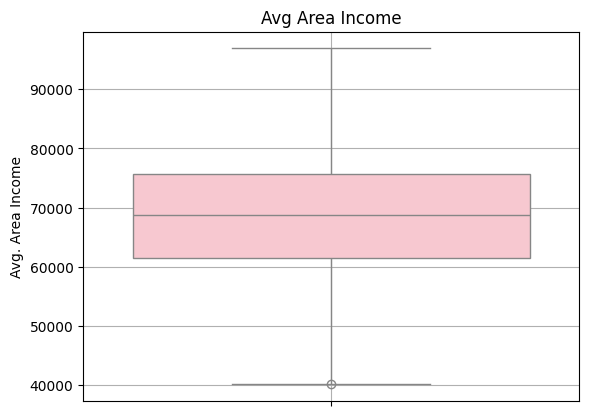

In [81]:
sns.boxplot(df['Avg. Area Income'], color='pink')
plt.title('Avg Area Income')
plt.grid()
plt.show()

In [82]:
df[(df['Avg. Area Income'] > 97000) | (df['Avg. Area Income'] < 40000)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


# feature encoding or droping 

In [83]:
df['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
89265 Robert Haven Apt. 492\nSmithburgh, FM 58565-1105           1
PSC 7034, Box 6131\nAPO AA 05662-4293                            1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 4966, dtype: int64

In [84]:
df.shape

(4966, 7)

In [85]:
df.drop(columns=['Address'],axis=1,inplace=True)

In [86]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# correlation 

In [87]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.006274,-0.012836,0.018610,-0.011947,0.629465
Avg. Area House Age,-0.006274,1.000000,-0.008912,0.005030,-0.018811,0.455607
Avg. Area Number of Rooms,-0.012836,-0.008912,1.000000,0.463133,0.004193,0.340249
Avg. Area Number of Bedrooms,0.018610,0.005030,0.463133,1.000000,-0.021517,0.171979
Area Population,-0.011947,-0.018811,0.004193,-0.021517,1.000000,0.414990
Price,0.629465,0.455607,0.340249,0.171979,0.414990,1.000000


In [88]:
df.corr()['Price']

Avg. Area Income                0.629465
Avg. Area House Age             0.455607
Avg. Area Number of Rooms       0.340249
Avg. Area Number of Bedrooms    0.171979
Area Population                 0.414990
Price                           1.000000
Name: Price, dtype: float64

# model  building 

In [89]:
X=df.iloc[:,:-1]
y=df['Price']

In [90]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [91]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4966, dtype: float64

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [97]:
X_train.shape

(3972, 5)

In [98]:
X_test.shape

(994, 5)

In [99]:
y_test.shape

(994,)

In [100]:
y_train.shape

(3972,)

In [ ]:
# linear regression 

In [101]:
lr=LinearRegression()

In [102]:
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
print(f'training accuracy : { round(lr.score(X_train,y_train)*100)}%')
print(f'test accuracy : { round(lr.score(X_test,y_test)*100)}%')

training accuracy : 92%
test accuracy : 92%


In [105]:
# decision tree 

In [106]:
dt=DecisionTreeRegressor(max_depth=9)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [107]:
print(f'training accuracy : { round(dt.score(X_train,y_train)*100)}%')
print(f'test accuracy : { round(dt.score(X_test,y_test)*100)}%')

training accuracy : 92%
test accuracy : 78%


In [108]:
# gradient boosting regressor 

In [111]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [113]:
print(f'training accuracy : { round(gb.score(X_train,y_train)*100)}%')
print(f'test accuracy : { round(gb.score(X_test,y_test)*100)}%')

training accuracy : 93%
test accuracy : 91%


# model training 

In [114]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [115]:
X_train[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2502,55306.141974,6.125857,6.410318,4.06,32142.947348
2770,84802.787605,5.101614,7.844812,6.04,35748.331474
2521,61909.041438,6.228343,6.593138,4.29,28953.925377


In [116]:
y_train[:3]

2502    6.479827e+05
2770    1.437984e+06
2521    1.063964e+06
Name: Price, dtype: float64

In [117]:
y_train_pred[:3]

array([ 838521.68881121, 1537885.93430884,  972616.39243308])

# slopes /coefficients 

In [118]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [119]:
lr.coef_

array([2.16406066e+01, 1.66104091e+05, 1.20673492e+05, 1.75557397e+03,
       1.51408551e+01])

In [124]:
pd.DataFrame(lr.coef_, index=X.columns ,columns=['Coefficients'])

,Coefficients
Avg. Area Income,21.640607
Avg. Area House Age,166104.090506
Avg. Area Number of Rooms,120673.492264
Avg. Area Number of Bedrooms,1755.573974
Area Population,15.140855


# model evaluation 

In [126]:
#training data 


In [127]:
mean_squared_error(y_train,y_train_pred)

10268623193.67436

In [128]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

101334.21531582686

In [129]:
mean_absolute_error(y_train,y_train_pred)

81605.20894176647

In [131]:
r2_score(y_train,y_train_pred)

0.9161466729297922

In [138]:
def evaluation(actual,predicted):
    mse=mean_squared_error(actual,predicted)
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    mae=mean_absolute_error(actual,predicted)
    r2=r2_score(actual,predicted)
    
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')
    print(f'ACCURACY : {r2}')
    
    plt.scatter(actual,predicted , color='pink' , marker='o')
    plt.plot([actual.min(),actual.max()],[actual.min(),actual.max()],
             'lightblue',lw=3,ls='--')
    plt.title('scatter plot ')
    plt.xlabel('actual values ')
    plt.ylabel('predicted values ')
    plt.show()

MSE : 10268623193.67436
RMSE : 101334.21531582686
MAE : 81605.20894176647
ACCURACY : 0.9161466729297922


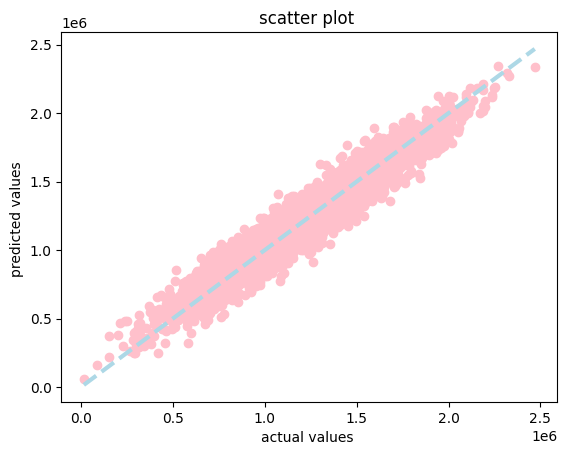

In [139]:
evaluation(y_train,y_train_pred)

In [135]:
#test data 

MSE : 9769360588.245775
RMSE : 98840.07582072049
MAE : 79388.31116422128
ACCURACY : 0.9180015018430217


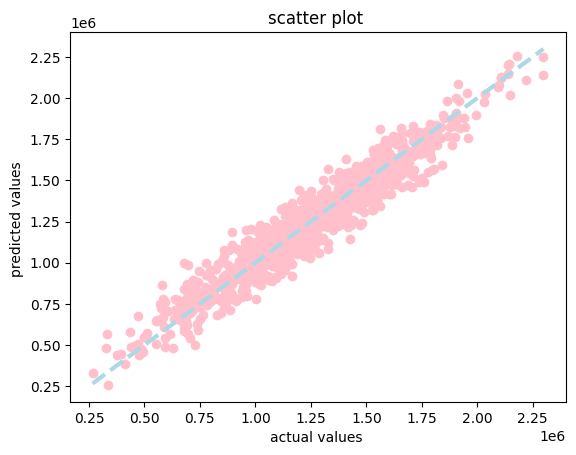

In [140]:
evaluation(y_test,y_test_pred)